<a href="https://colab.research.google.com/github/TheLiss/mlcourse_notebooks/blob/main/mlcourse__assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
DATA_PATH = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/main/data/'

In [ ]:
df = pd.read_csv(DATA_PATH + 'winequality-white.csv', sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=17)

In [ ]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
96,6.0,0.34,0.66,15.9,0.046,26.0,164.0,0.99790,3.14,0.50,8.8
2292,6.5,0.32,0.23,1.2,0.054,39.0,208.0,0.99272,3.18,0.46,9.9
1054,7.0,0.31,0.52,1.7,0.029,5.0,61.0,0.99180,3.07,0.43,10.4
3687,6.0,0.16,0.27,12.0,0.030,39.0,98.0,0.99402,3.15,0.34,10.8
596,6.9,0.41,0.33,10.1,0.043,28.0,152.0,0.99680,3.20,0.52,9.4
...,...,...,...,...,...,...,...,...,...,...,...
2800,6.6,0.25,0.51,8.0,0.047,61.0,189.0,0.99604,3.22,0.49,9.2
1337,6.7,0.18,0.30,6.4,0.048,40.0,251.0,0.99560,3.29,0.52,10.0
406,5.8,0.28,0.34,4.0,0.031,40.0,99.0,0.98960,3.39,0.39,12.8
2191,9.2,0.23,0.35,10.7,0.037,34.0,145.0,0.99810,3.09,0.32,9.7


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression(n_jobs=-1)

In [ ]:
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print(f'Train set mean squred error = {mean_squared_error(lr.predict(X_train), y_train)}')
print(f'Test set mean squred error = {mean_squared_error(lr.predict(X_test), y_test)}')

Train set mean squred error = 0.5580606489803572
Test set mean squred error = 0.5842473102404545


In [ ]:
feature_importance = pd.DataFrame(lr.coef_, index=X.columns).abs().sort_values(0, ascending=False)

<Axes: title={'center': 'LinReg feature importance'}>

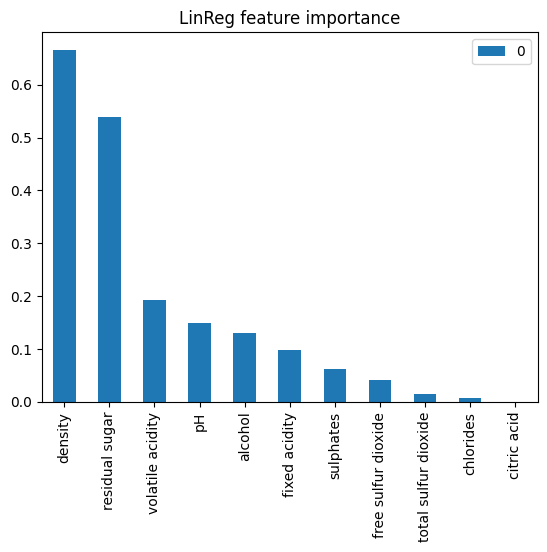

In [ ]:
feature_importance.plot(kind='bar', title='LinReg feature importance')

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.01, random_state=17)

In [ ]:
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, random_state=17)

In [ ]:
print(f'Train set mean squred error = {mean_squared_error(lasso.predict(X_train), y_train)}')
print(f'Test set mean squred error = {mean_squared_error(lasso.predict(X_test), y_test)}')

Train set mean squred error = 0.5637869195669825
Test set mean squred error = 0.5736627127525901


In [ ]:
lasso_feature_importance = pd.DataFrame(lasso.coef_, index=X.columns).abs().sort_values(0, ascending=False)

<Axes: title={'center': 'Lasso features importance'}>

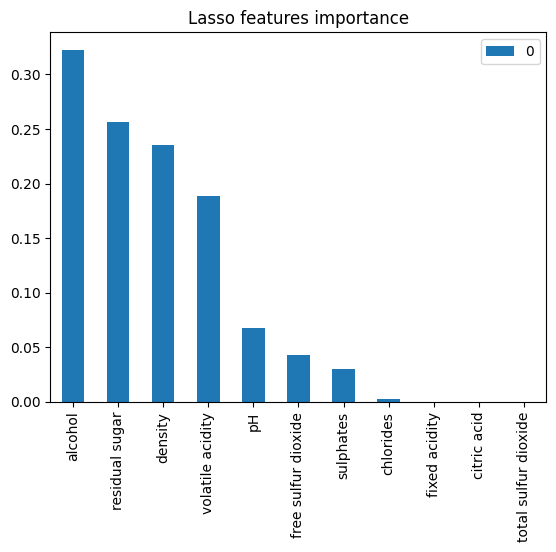

In [ ]:
lasso_feature_importance.plot(kind='bar', title='Lasso features importance')

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
alphas = np.logspace(-6,2,200)

In [ ]:
lassocv = LassoCV(alphas=alphas, random_state=17)

In [ ]:
lassocv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.09698580e-06, 1.20337784e-06, 1.32008840e-06,
       1.44811823e-06, 1.58856513e-06, 1.74263339e-06, 1.91164408e-06,
       2.09704640e-06, 2.30043012e-06, 2.52353917e-06, 2.76828663e-06,
       3.03677112e-06, 3.33129479e-06, 3.65438307e-06, 4.00880633e-06,
       4.39760361e-06, 4.82410870e-06, 5.29197874e-06, 5.80522552e-06,
       6.36824994e-06, 6.98587975e-0...
       1.18953407e+01, 1.30490198e+01, 1.43145894e+01, 1.57029012e+01,
       1.72258597e+01, 1.88965234e+01, 2.07292178e+01, 2.27396575e+01,
       2.49450814e+01, 2.73644000e+01, 3.00183581e+01, 3.29297126e+01,
       3.61234270e+01, 3.96268864e+01, 4.34701316e+01, 4.76861170e+01,
       5.23109931e+01, 5.73844165e+01, 6.29498899e+01, 6.90551352e+01,
       7.57525026e+01, 8.30994195e+01, 9.11588830e+01, 1.00000000e+02]),
        random_state=17)

In [ ]:
lassocv.alpha_

0.0002833096101839324

In [ ]:
lassocv_feature_importance = pd.DataFrame(lassocv.coef_, index=X.columns).abs().sort_values(0, ascending=False)

<Axes: title={'center': 'Lassocv features importance'}>

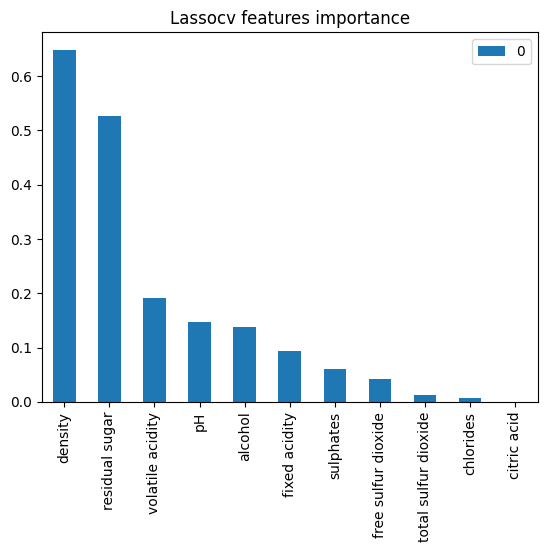

In [ ]:
lassocv_feature_importance.plot(kind='bar', title='Lassocv features importance')

In [ ]:
print(f'Train set mean squred error = {mean_squared_error(lassocv.predict(X_train), y_train)}')
print(f'Test set mean squred error = {mean_squared_error(lassocv.predict(X_test), y_test)}')

Train set mean squred error = 0.558070014187378
Test set mean squred error = 0.5832976077860635


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfg = RandomForestRegressor(random_state=17)

In [ ]:
rfg.fit(X_train, y_train)

RandomForestRegressor(random_state=17)

In [ ]:
rfg.feature_importances_

array([0.0619179 , 0.12596005, 0.0589043 , 0.07090291, 0.0637292 ,
       0.11656226, 0.06720435, 0.05653952, 0.07195032, 0.05905582,
       0.24727337])

In [ ]:
rfg_feature_importance = pd.DataFrame(rfg.feature_importances_, index=X.columns).abs().sort_values(0, ascending=False)

<Axes: title={'center': 'Random Forest features importance'}>

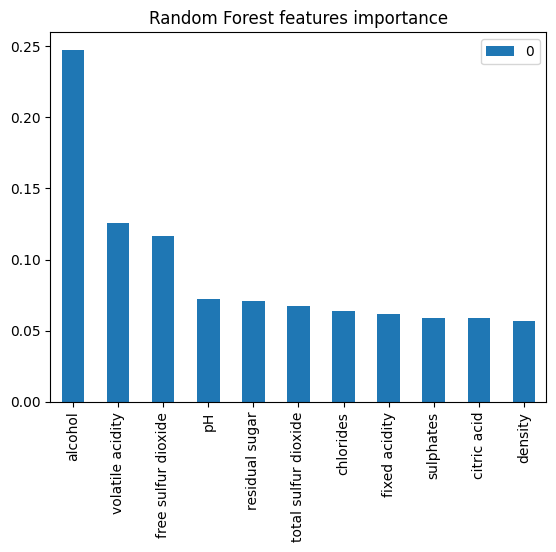

In [ ]:
rfg_feature_importance.plot(kind='bar', title='Random Forest features importance')

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cv_score = cross_val_score(rfg, X, y, scoring='neg_mean_squared_error').mean()

In [ ]:
print(f'Train set mean squred error = {mean_squared_error(rfg.predict(X_train), y_train)}')
print(f'Cross val mean squred error = {abs(cv_score)}')
print(f'Test set mean squred error = {mean_squared_error(rfg.predict(X_test), y_test)}')

Train set mean squred error = 0.05261155192532089
Cross val mean squred error = 0.5347123359738175
Test set mean squred error = 0.37163775510204083


In [ ]:
forest_params = {'max_depth': list(range(10, 25)),
                 'min_samples_leaf': list(range(1, 8)),
                 'max_features': list(range(6,12))}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
forest_grid = GridSearchCV(rfg, param_grid=forest_params, cv=5, n_jobs=-1)

In [ ]:
forest_grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
tuned_forest = RandomForestRegressor(max_depth=19, max_features=7, min_samples_leaf=1)

In [ ]:
tuned_forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=19, max_features=7)

In [ ]:
cv_score = cross_val_score(tuned_forest, X, y, scoring='neg_mean_squared_error').mean()

In [ ]:
print(f'Train set mean squred error = {mean_squared_error(tuned_forest.predict(X_train), y_train)}')
print(f'Cross val mean squred error = {abs(cv_score)}')
print(f'Test set mean squred error = {mean_squared_error(tuned_forest.predict(X_test), y_test)}')

Train set mean squred error = 0.05864278389955586
Cross val mean squred error = 0.5304355052447847
Test set mean squred error = 0.3712844119919633


In [ ]:
tuned_forest_feature_importance = pd.DataFrame(tuned_forest.feature_importances_, index=X.columns).abs().sort_values(0, ascending=False)

<Axes: title={'center': 'Random Forest features importance'}>

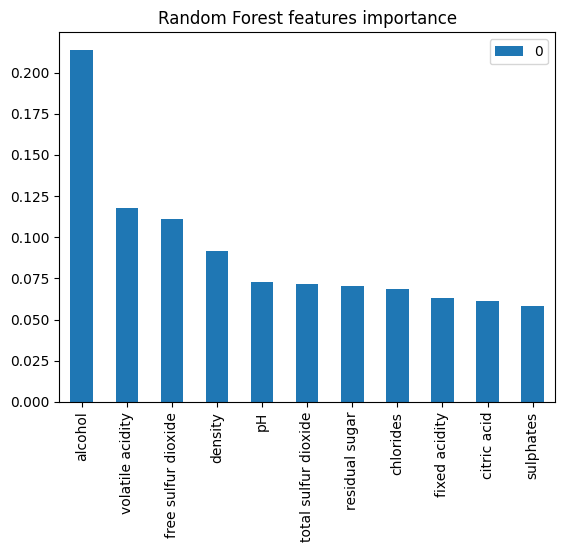

In [ ]:
tuned_forest_feature_importance.plot(kind='bar', title='Random Forest features importance')